In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" 
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

#Construct Phase
n_inputs=28*28 #MNIST
n_hidden1=300
n_hidden2=100
n_outputs=10

X=tf.placeholder(dtype=tf.float32,shape=(None,n_inputs),name="X")
y=tf.placeholder(dtype=tf.int32,shape=(None),name="y")

def neuron_layer(X,n_neurons,name,activation=None):
    with tf.name_scope(name):
        n_inputs=int(X.get_shape()[1])
        init=tf.truncated_normal((n_inputs,n_neurons),stddev=0.5)
        W=tf.Variable(init,dtype=tf.float32,name="Weight")
        b=tf.Variable(tf.zeros([n_neurons]),name="Bias")
        z=tf.matmul(X,W)+b
        if activation=="relu":
            return tf.nn.relu(z)
        else:
            return z

with tf.name_scope("DNN"):
    hidden1=fully_connected(X,n_hidden1,scope="hidden1")
    hidden2=fully_connected(hidden1,n_hidden2,scope="hidden2")
    logits=fully_connected(hidden2,n_outputs,scope="outputs",activation_fn=None)
with tf.name_scope("Loss"):
    entropy=tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss=tf.reduce_mean(entropy, name="loss")
with tf.name_scope("Train"):
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op=optimizer.minimize(loss)
with tf.name_scope("Eval"):
    correct=tf.nn.in_top_k(logits,y,1)
    accuracy=tf.reduce_mean(tf.cast(correct,tf.float32))
    
#Excution Phase
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("/tmp/data/")
n_epochs=100
batch_size=50

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for i in range(mnist.train.num_examples//batch_size):
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(train_op,feed_dict={X:X_batch,y:y_batch})
        acc_train = accuracy.eval(feed_dict={X:X_batch,y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:mnist.test.images,
                                           y:mnist.test.labels})
        print(epoch,"Train acc: ", acc_train,"Test acc: ", acc_test)
    saver=tf.train.Saver().save(sess,"./my_model.ckpt")
    


W0930 12:30:00.083473 140364208678720 deprecation.py:323] From <ipython-input-2-79bd43e7c0dc>:43: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0930 12:30:00.084308 140364208678720 deprecation.py:323] From /home/tuanna/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0930 12:30:00.085484 140364208678720 deprecation.py:323] From /home/tuanna/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is depre

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz


W0930 12:30:07.040595 140364208678720 deprecation.py:323] From /home/tuanna/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz


W0930 12:30:08.355308 140364208678720 deprecation.py:323] From /home/tuanna/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
0 Train acc:  0.88 Test acc:  0.8966
1 Train acc:  0.94 Test acc:  0.9169
2 Train acc:  0.96 Test acc:  0.9239
3 Train acc:  0.94 Test acc:  0.9328
4 Train acc:  0.96 Test acc:  0.9395
5 Train acc:  0.96 Test acc:  0.9448
6 Train acc:  0.96 Test acc:  0.9472
7 Train acc:  0.96 Test acc:  0.9506
8 Train acc:  0.94 Test acc:  0.9541
9 Train acc:  0.98 Test acc:  0.956
10 Train acc:  0.94 Test acc:  0.9586
11 Train acc:  1.0 Test acc:  0.9615
12 Train acc:  0.98 Test acc:  0.9624
13 Train acc:  1.0 Test acc:  0.9639
14 Train acc:  0.96 Test acc:  0.9652
15 Train acc:  1.0 Test acc:  0.9663
16 Train acc:  0.96 Test acc:  0.9673
17 Train acc:  0.98 Test acc:  0.967
18 Train acc:  0.98 Test acc:  0.9693
19 Train acc:  0.98 Test acc:  0.969
20 Train acc:  1.0 Test acc:  0.9699
21 Train acc:  0.98 Test acc:  0.971
22 Train acc:  1.0 Test acc:  0.9717
23 Train acc:  1.0 Test acc:  0.9721

[7] 7


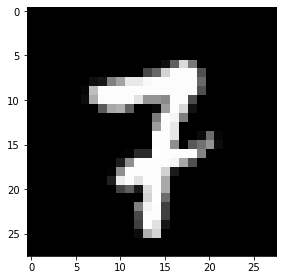

In [4]:
import tensorflow as tf
import skimage
import numpy as np
img=mnist.test.images[328].reshape(28,28)
skimage.io.imshow(img)
with tf.Session() as sess:
    tf.train.Saver().restore(sess,"./my_model.ckpt")
    Z=logits.eval(feed_dict={X:mnist.test.images[328].reshape(1,-1)})
    y_pred=np.argmax(Z,axis=1)
    print(y_pred,mnist.test.labels[328])